In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

### Цель проекта: определить, какие факторы учащихся в возрасте от 15 до 22 лет влияют на результат на экзаминах по математике

#### 1 этап: подготовить данные, чтобы можно было одинаковое количество строк в каждом столбце

In [4]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


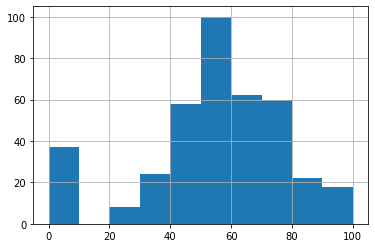

In [10]:
# Видно, что данные в датафрейме содержат различное количество строк, значит, некоторые данные пропущены.

In [186]:
# оставляем только те строки, где есть значение score, поскольку  score - это ключевой столбец
stud_math_2 = stud_math[stud_math['score'] >= 0]

In [187]:
stud_math_2
stud_math_2.info()
# после преобразования видно, что колонка score имеет максимальное число строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [188]:
# заменяем все пустые значения объектного типа на моду (наиболее встречаемые значения)
columns_object_list = stud_math_3.select_dtypes(exclude = [np.number]).columns
for column in columns_object_list:
    mode_column = stud_math_3[column].mode()[0]
    stud_math_3[column] = stud_math_3[column].apply(lambda x: mode_column if str(x) == 'nan' else x)
stud_math_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 389 non-null    float64
 7   Fedu                 389 non-null    float64
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            389 non-null    obj

In [190]:
# Заменяем все пустые строки числовых значений на медиану
columns_number_list = stud_math_3.select_dtypes([np.number]).columns
for column in columns_number_list:
    median_column = stud_math_3[column].median()
    stud_math_3[column] = stud_math_3[column].apply(lambda x: median_column if str(x) == 'nan' else x)
stud_math_3.info()
# в результате мы видим, что все колонки имеет одинаковое количество строк со значениями

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 389 non-null    float64
 7   Fedu                 389 non-null    float64
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            389 non-null    obj

#### 2 этап: оценка качества числовых значений в колонках и необходимые преобразования

In [191]:
# Проанализируем каждую колонку с числами, которые могут влиять на score
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

<AxesSubplot:xlabel='age'>

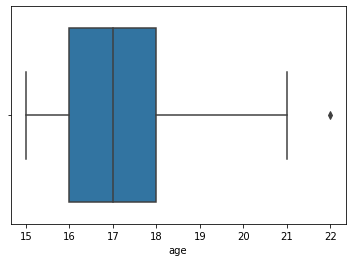

In [100]:
sns.boxplot(x = stud_math_3.age)

In [75]:
# Есть выбросы в колонке  'age'
stud_math_3.age.max()

22

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

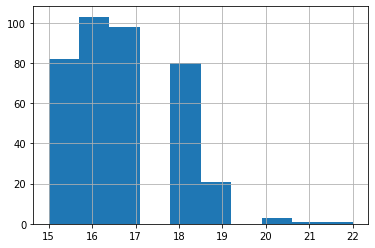

In [192]:
stud_math_3.age.hist()
stud_math_3.age.describe()
# Однако разница в 1 год од IQR не представляется необходимой для модификаци 

<AxesSubplot:xlabel='Medu'>

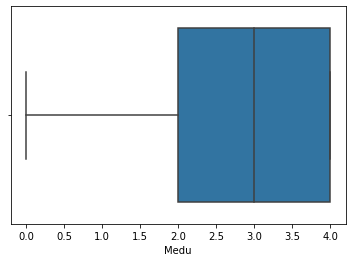

In [193]:
sns.boxplot(x = stud_math_3.Medu)
# подобным образом анализируем последующие колонки

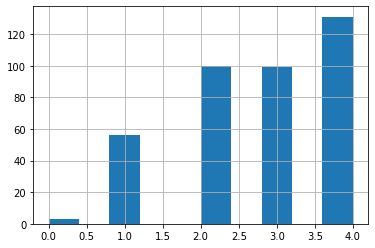

In [85]:
stud_math_3.Medu.hist()

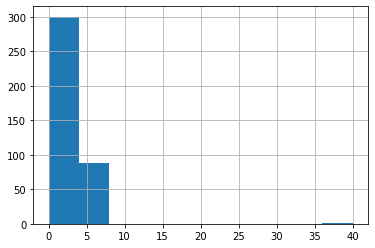

In [97]:
stud_math_3.Fedu.hist()

<AxesSubplot:xlabel='Fedu'>

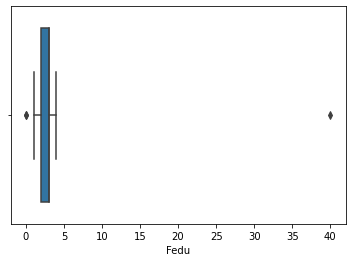

In [102]:
sns.boxplot(x = stud_math_3.Fedu)
# Выбросы в fedu явно искажают реальную ситуацию. Поскольку максимальное значение Fedu
# предусмотрено 4, то 40 - явная ошибка, которую нужно исправить

In [116]:
stud_math_4 = stud_math_3.copy()
stud_math_4.Fedu = stud_math_4.Fedu.replace(40,4)

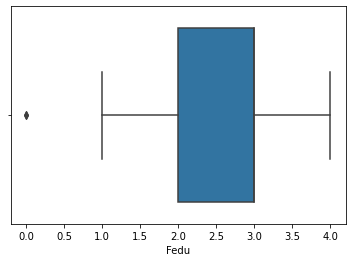

In [90]:
# После исправления boxplot выглядит более адекватно. Значение 0 (отсутствие образования)
# можно считать вполне реальным явлением, которые стоит учитывать
sns.boxplot(x = stud_math_3.Fedu)

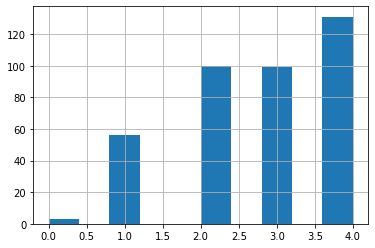

In [98]:
stud_math_4.Fedu.hist()

<AxesSubplot:xlabel='traveltime'>

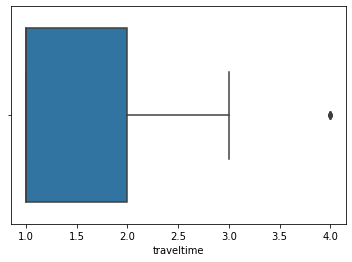

In [103]:
sns.boxplot(x = stud_math_4.traveltime)

count    389.000000
mean       1.403599
std        0.676625
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

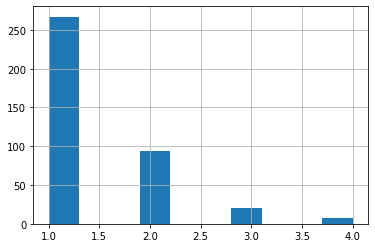

In [105]:
stud_math_4.traveltime.hist()
stud_math_4.traveltime.describe()
# выброс на уровне 4 вполне реалистичен
# среднее находится на уровне 1, значение выброса 4 не переместило вправо среднее

count    389.000000
mean       2.035990
std        0.839575
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

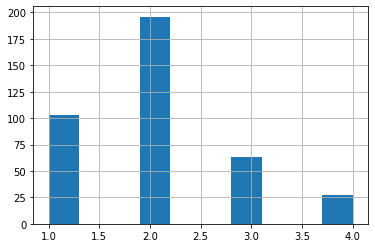

In [106]:
stud_math_4.studytime.hist()
stud_math_4.studytime.describe()

<AxesSubplot:xlabel='studytime'>

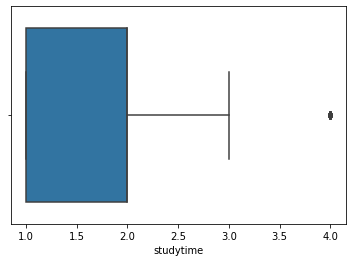

In [107]:
sns.boxplot(x = stud_math_4.studytime)
# выброс на уровне 4 не повлиял на смещение среднего вправо по отношению к медиане

<AxesSubplot:xlabel='failures'>

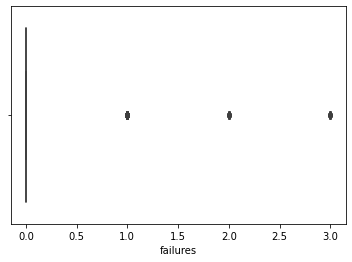

In [108]:
sns.boxplot(x = stud_math_4.failures)

count    389.000000
mean       0.308483
std        0.712521
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

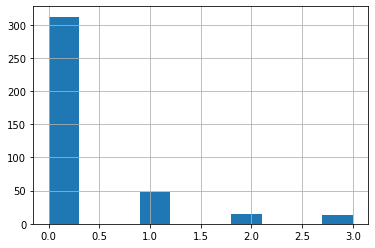

In [109]:
stud_math_4.failures.hist()
stud_math_4.failures.describe()
# количество неудач не так велико, разброс и Q3 находятся на 0

count    389.000000
mean      -6.107969
std        2.518726
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

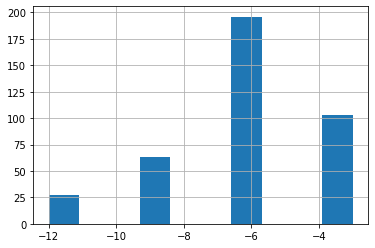

In [194]:
# таинственная колонка будет рассмотрена на последующих этапах
stud_math_4['studytime, granular'].hist()
stud_math_4['studytime, granular'].describe()

<AxesSubplot:xlabel='studytime, granular'>

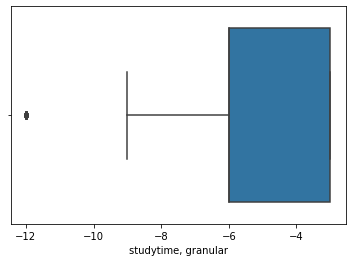

In [113]:
sns.boxplot(x = stud_math_4['studytime, granular'])

count    389.000000
mean       3.935733
std        0.898730
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

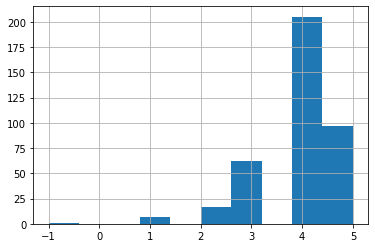

In [114]:
stud_math_4['famrel'].hist()
stud_math_4['famrel'].describe()
# значение -1 - явная ошибка, поскольку мин значение может быть 1

<AxesSubplot:xlabel='famrel'>

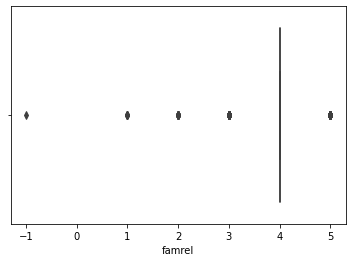

In [115]:
sns.boxplot(x = stud_math_4['famrel'])

In [195]:
# заменяем значение на более правдоподобное
stud_math_5 = stud_math_4.copy()
stud_math_5.famrel = stud_math_5.famrel.replace(-1,1)

count    389.000000
mean       3.940874
std        0.875850
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

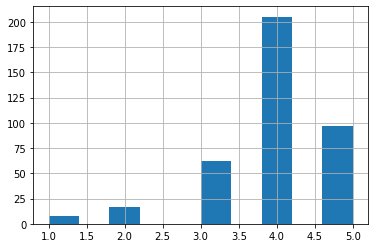

In [119]:
stud_math_5['famrel'].hist()
stud_math_5['famrel'].describe()
# после изменения -1 на 1 график принял более нормальный расклад
# на данном этапе оставляем колонку для последующего анализа

<AxesSubplot:xlabel='famrel'>

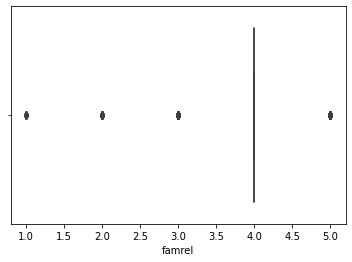

In [120]:
sns.boxplot(x = stud_math_5['famrel'])

count    389.000000
mean       3.218509
std        0.982353
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

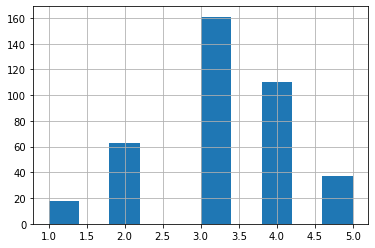

In [196]:
stud_math_5['freetime'].hist()
stud_math_5['freetime'].describe()
# на данном этапе оставляем колонку без изменений

<AxesSubplot:xlabel='freetime'>

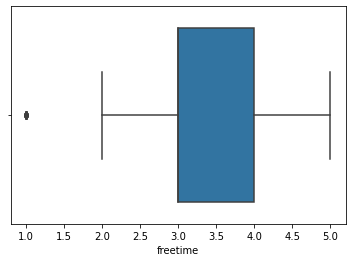

In [122]:
sns.boxplot(x = stud_math_5['freetime'])

count    389.000000
mean       3.092545
std        1.106062
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

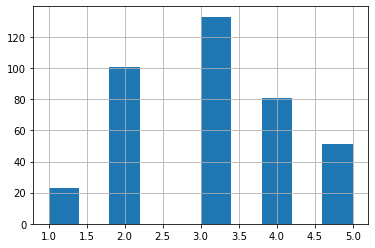

In [197]:
stud_math_5['goout'].hist()
stud_math_5['goout'].describe()
# на данном этапе оставляем без изменений

<AxesSubplot:xlabel='goout'>

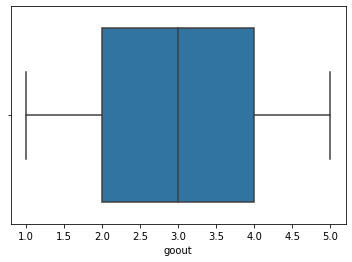

In [125]:
sns.boxplot(x = stud_math_5['goout'])

count    389.000000
mean       3.547558
std        1.377629
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

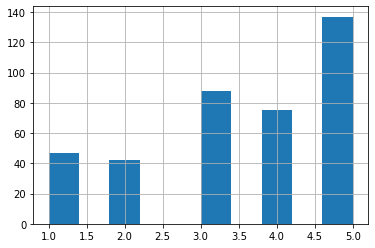

In [198]:
stud_math_5['health'].hist()
stud_math_5['health'].describe()
# на данном этапе оставляем без изменений

<AxesSubplot:xlabel='health'>

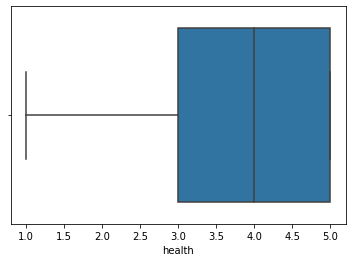

In [127]:
sns.boxplot(x = stud_math_5['health'])

count    389.000000
mean       7.226221
std       23.284884
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

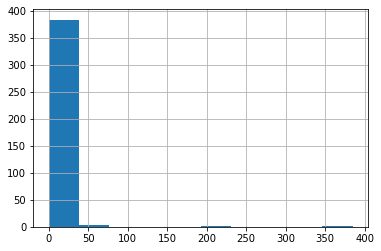

In [128]:
stud_math_5['absences'].hist()
stud_math_5['absences'].describe()
# большое количество пропущенных занятий не является типичным явлением, однако
# выбросы могут сильно влиять на статистические показатели

<AxesSubplot:xlabel='absences'>

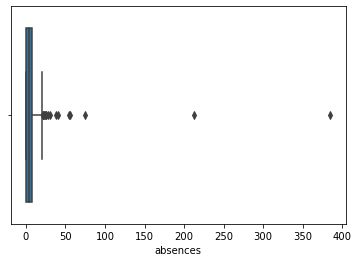

In [129]:
sns.boxplot(x = stud_math_5['absences'])

In [142]:
# необходимо удалить отбросы
IQR = stud_math_5.absences.quantile(0.75) - stud_math_5.absences.quantile(0.25)
perc25 = stud_math_5.absences.quantile(0.25)
perc75 = stud_math_5.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


count    389.000000
mean       5.264781
std        5.749435
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       20.000000
Name: absences, dtype: float64

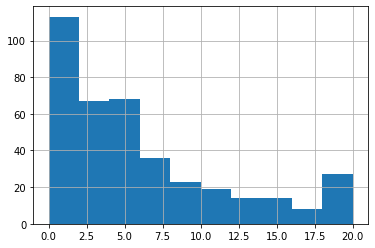

In [200]:
stud_math_6 = stud_math_5.copy()
stud_math_6.absences= stud_math_6.absences.apply(lambda x:20  if x > 20 else x)
stud_math_6['absences'].hist()
stud_math_6['absences'].describe()
# после преобразований график приобрел более нормальный вид, в котором видно распределение

#### 3 этап: анализ корреляции численных значений

In [141]:
stud_math_6.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146405,-0.150142,0.076013,-0.018019,0.206279,0.018019,0.056941,0.013994,0.121057,-0.065719,0.192897,-0.155726
Medu,-0.146405,1.000000,0.602619,-0.152597,0.079513,-0.239668,-0.079513,-0.003566,0.037699,0.071235,-0.054431,0.098201,0.209758
Fedu,-0.150142,0.602619,1.000000,-0.127860,0.020823,-0.259146,-0.020823,-0.017128,-0.008456,0.050380,0.017967,0.026027,0.124559
traveltime,0.076013,-0.152597,-0.127860,1.000000,-0.098226,0.035113,0.098226,-0.029213,-0.016696,0.046390,-0.035852,-0.020253,-0.056535
studytime,-0.018019,0.079513,0.020823,-0.098226,1.000000,-0.169399,-1.000000,0.037950,-0.122057,-0.053554,-0.072790,-0.082602,0.114295
failures,0.206279,-0.239668,-0.259146,0.035113,-0.169399,1.000000,0.169399,-0.028517,0.087558,0.101036,0.082165,0.100804,-0.337187
"studytime, granular",0.018019,-0.079513,-0.020823,0.098226,-1.000000,0.169399,1.000000,-0.037950,0.122057,0.053554,0.072790,0.082602,-0.114295
famrel,0.056941,-0.003566,-0.017128,-0.029213,0.037950,-0.028517,-0.037950,1.000000,0.164830,0.069514,0.088845,-0.085939,0.052902
freetime,0.013994,0.037699,-0.008456,-0.016696,-0.122057,0.087558,0.122057,0.164830,1.000000,0.294450,0.063718,0.003876,0.017481
goout,0.121057,0.071235,0.050380,0.046390,-0.053554,0.101036,0.053554,0.069514,0.294450,1.000000,-0.016427,0.084490,-0.127742


In [201]:
# Studytime, granular имеет идеальную отрицательную корреляцию с studytime, поэтому для анализа нет необходимости 
# использовать эту колонку: достаточно studytime.
stud_math_7 = stud_math_6.copy()
stud_math_7 = stud_math_7.drop(['studytime, granular'],1)

<AxesSubplot:>

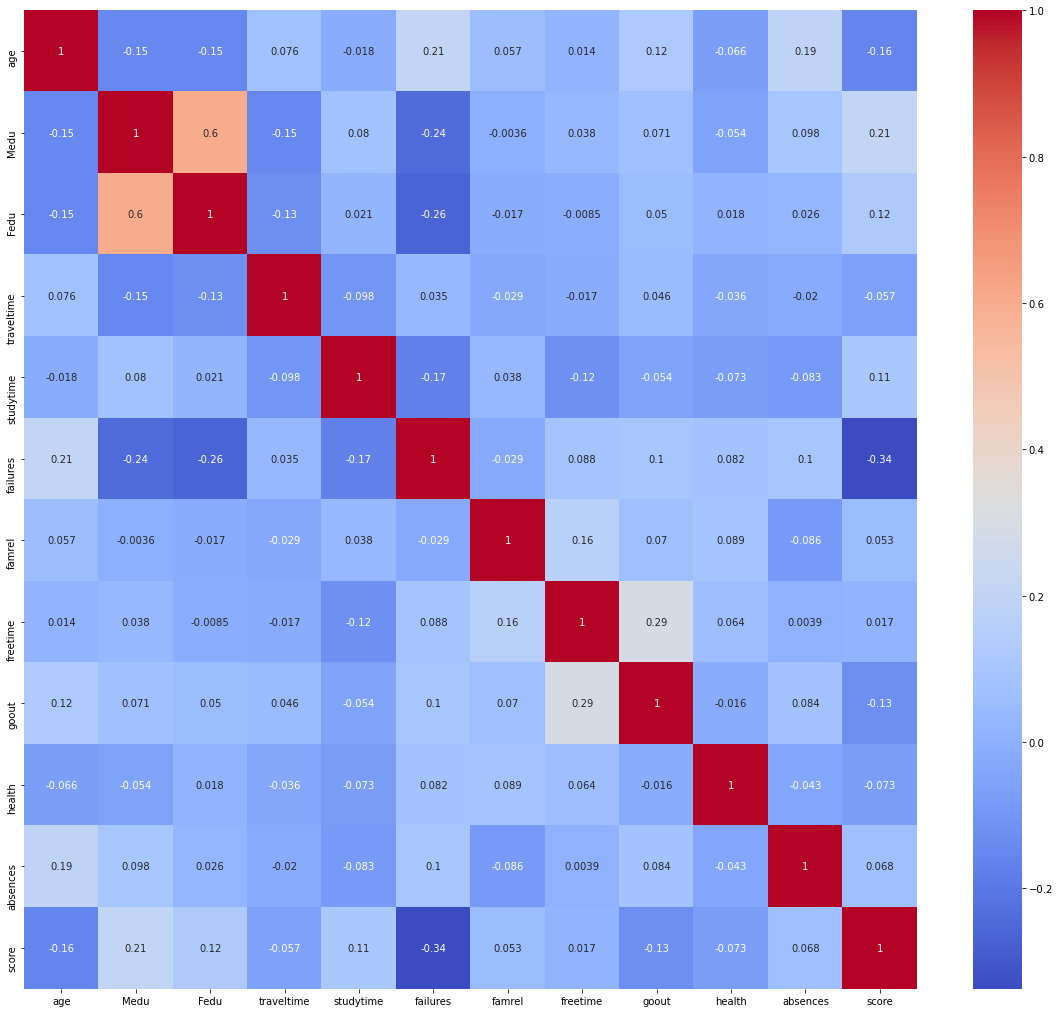

In [202]:
# для более наглядного представления зависимости построим график heatmap
correlation = stud_math_7.corr()
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(correlation, annot=True,cmap='coolwarm')

#### Промежуточные выводы после 3 этапа:

Видна обратная зависимость -0.34 между пропущенными уроками и баллами по математике. Это значит, что большее количество пропущенных уроков
негативно влияет на баллы по математике на госэкзаминах
Некоторая зависимость на уровне 0.21 есть между образованием матери и баллами на экзамине: чем выше образование
матери, тем выше балл

#### 4 этап: графический анализ номинативных показателей

In [204]:
# Используем boxplot для визуализации статистических значений различных показателей
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 3))
    sns.boxplot(x=column, y='score', 
                data=stud_math_7.loc[stud_math_7.loc[:, column].isin(stud_math_7.loc[:, column].value_counts().index[:28])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

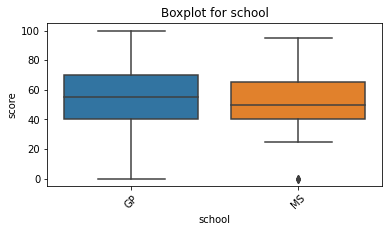

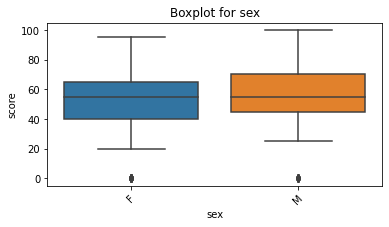

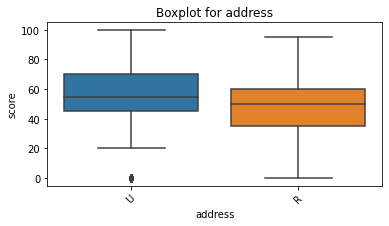

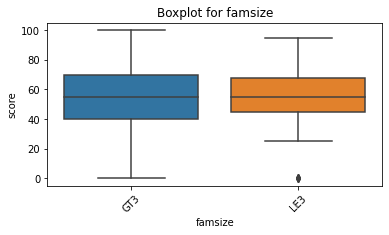

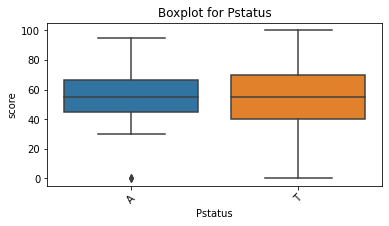

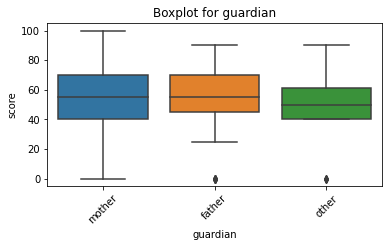

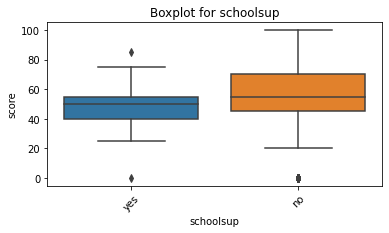

In [168]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','guardian','schoolsup']:
    get_boxplot(col)

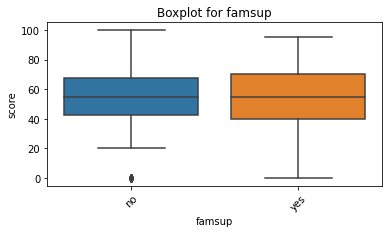

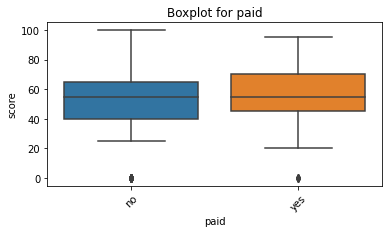

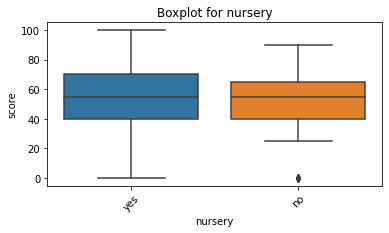

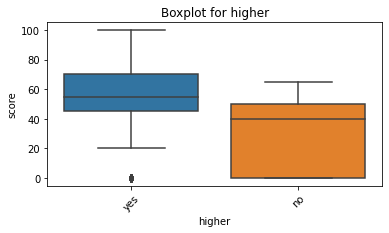

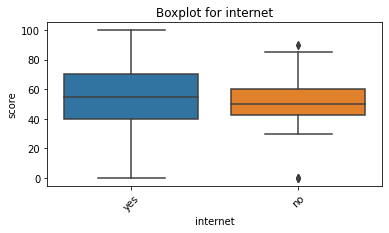

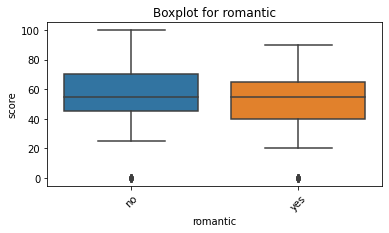

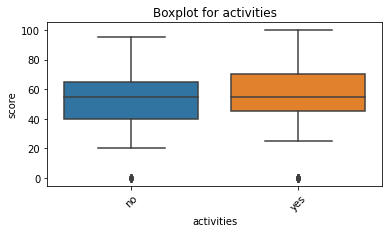

In [170]:
for col in ['famsup','paid','nursery','higher','internet','romantic','activities']:
    get_boxplot(col)

In [149]:
def get_boxplot_2(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math_7.loc[stud_math_7.loc[:, column].isin(stud_math_7.loc[:, column].value_counts().index[:28])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

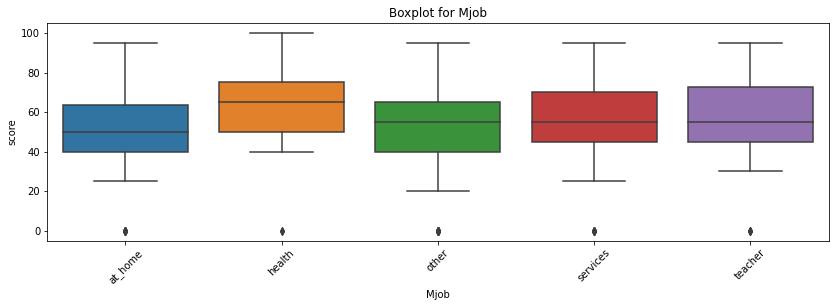

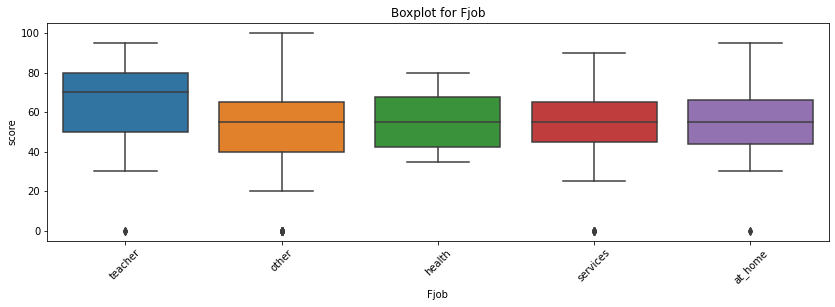

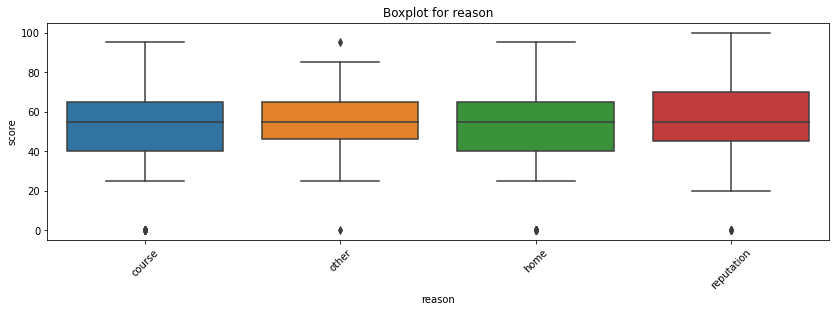

In [171]:
for col in ['Mjob', 'Fjob', 'reason']:
    get_boxplot_2(col)

#### Промежуточные выводы после 4 этапа:

Анализ графиков boxplot показал, что видна зависимость баллов от следующих факторов: school, higher, internet, Mjob and Fjob. Т.е. учащиеся разных школ могут иметь разные баллы математики на экзаминах, а желание продолжить обучение в ВУЗах влияет на мотивацию и баллы. Наличие интернета тоже влияет на среднюю оценку, а также работа родителей. Явно видна высокая средняя среди учащихся, отец которых работает учителем, не смотря на то, что иная профессия отца не влияет на баллы по математике. Более точный вывод можно будет сделать, проведя анализ теста Стьюедента.

#### 5 этап: использования теста Стьюдента для определения влияния номинативных значений

In [173]:
def get_stat_dif(column):
    cols = stud_math_7.loc[:, column].value_counts().index[:28]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math_7.loc[stud_math_7.loc[:, column] == comb[0], 'score'], 
                        stud_math_7.loc[stud_math_7.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break

In [185]:
for col in ['school', 'higher', 'internet', 'Mjob', 'Fjob','reason','activities','romantic','nursery','paid','famsup','schoolsup','guardian','Pstatus','famsize','address','sex']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки address


#### Общий вывод:

После проведения теста Стьюдента можно отбросить влияние школы, интернета и профессии отца на средний балл по 
математике на экзамине, но дополнительно выявлено влияние романтичиских отношений, а также адреса учащихся.
Добавляем числовые значения, выявленные в результате анализа корреляции: отсутствие на уроках, а также образование
матери (Medu). Это данные, которые стоит использовать в модели     

In [207]:
stud_math_model = stud_math_7.loc[:, ['higher', 'Mjob', 'romantic', 'address', 'absences','Medu']]
stud_math_model.head(10)

,higher,Mjob,romantic,address,absences,Medu
0,yes,at_home,no,U,6.0,4.0
1,yes,at_home,no,U,4.0,1.0
2,yes,at_home,no,U,10.0,1.0
3,yes,health,yes,U,2.0,4.0
4,yes,other,no,U,4.0,3.0
5,yes,services,no,U,10.0,4.0
6,yes,other,no,U,0.0,2.0
7,yes,other,no,U,6.0,4.0
8,yes,services,no,U,0.0,3.0
9,yes,other,no,U,0.0,3.0
